In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

Use a binary classification dataset that classifies tumors as malignant or benign.

In [24]:
data = pd.read_csv("data.csv")
X = data.drop(columns=['id', 'diagnosis'])  # input feature values for each tumor
X = X.apply(pd.to_numeric, errors='coerce')  # convert everything possible to numbers
X = X.fillna(0).values                       # replace NaN with 0

y = data['diagnosis'].values # actual class labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [27]:
print(np.unique(y))  # What do you actually see?
print(np.isnan(X).sum())  # Should be 0

['B' 'M']
0


Make a scatterplot:

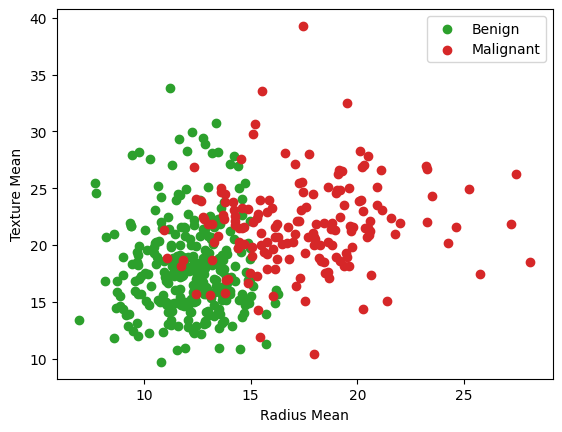

In [25]:
plt.scatter(X_train[y_train == 'B', 0], X_train[y_train == 'B', 1], color='tab:green', label='Benign')
plt.scatter(X_train[y_train == 'M', 0], X_train[y_train == 'M', 1], color='tab:red', label='Malignant')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend()
plt.show()

Calculate Euclidean distance:

In [26]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((b - a) ** 2))

In [28]:
class KNN:
    def __init__(self, k): # Set number of neighbors k we want to consider
        self.k = k

    def fit(self, X, y): # Training phase - > store training data
        self.X_train = X
        self.y_train = y

    def predict(self, new_points): # Prediction phase - > predict class for new points
        predictions = [self.predict_class(new_point) for new_point in new_points]
        return np.array(predictions)
    
    def predict_class(self, new_point): # Takes in single point and predicts its class based on nearest neighbors
        distances = [euclidean_distance(point, new_point) for point in self.X_train]

        k_nearest_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]

        most_common = Counter(k_nearest_labels).most_common(1)[0][0]

        return most_common

In [29]:
knn = KNN(7)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = np.mean(predictions == y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 92.98%


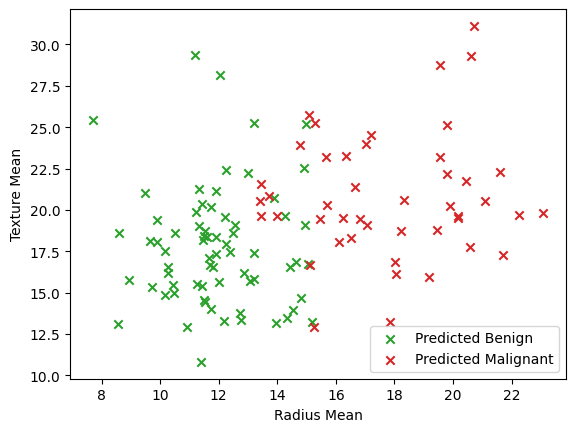

In [30]:
mask_B = predictions == 'B'
mask_M = predictions == 'M'

plt.scatter(X_test[mask_B, 0], X_test[mask_B, 1], color='tab:green', label='Predicted Benign', marker='x')
plt.scatter(X_test[mask_M, 0], X_test[mask_M, 1], color='tab:red', label='Predicted Malignant', marker='x')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend()
plt.show()